### First test of a notebook is formatted printing and links

In [4]:
from IPython.display import Image, display, Math, Latex
display(Math(r'\sqrt{a^2 + b^2}')) 
display(Math(r'\sum{\Delta \space min(x^2, (2\pi \space sin(y^2))}'))
from IPython.core.display import HTML
display(HTML("""<a href="https://google.com">Google</a>"""))
Image(url= "https://octodex.github.com/images/yaktocat.png", width =100)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### access another notebook
#### Links are of the format:   user text in brackets + url in parentheses


[Here is a link to another notebook to set styles](http://localhost:8889/notebooks/Python%20code%20to%20drive%20Cytoscape.ipynb#)

[Here is an image in its own window](https://octodex.github.com/images/yaktocat.png)

Embedded image:
<img src="https://octodex.github.com/images/yaktocat.png",width=100>




### Now we show using Cytoscape 3
File:  GalFiltered.sif

In [9]:
# import data from url
from py2cytoscape.data.cyrest_client import CyRestClient
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Load a sample network
yeast = cy.network.create_from('http://chianti.ucsd.edu/~kono/data/galFiltered.sif')
# yeast = cy.network.create_from('~/tests/galFiltered.sif')

# apply the default layout to the yeast network object
cy.layout.apply(network = yeast)
cy.layout.fit(network = yeast)

# generate a PNG and show it
yeast_png = yeast.get_png(400)
Image(yeast_png)

In [ ]:
from py2cytoscape.data.cyrest_client import CyRestClient
from time import ctime

# Create an instance of cyREST client.  Default IP is 'localhost', and port number is 1234.
# cy = CyRestClient() - This default constructor creates connection to http://localhost:1234/v1
cy = CyRestClient(ip='127.0.0.1', port=1234)


network = cy.network.create(name='My Network', collection='My network collection')
print('New network created with py2cytoscape at ' + str(ctime()) + '.  Its SUID is ' + str(network.get_id()))

# Reset
cy.session.delete()


# Step 2: Load network from somewhere
yeast = cy.network.create_from('tests/galFiltered.sif')
yeast = cy.network.create_from('http://chianti.ucsd.edu/~kono/data/galFiltered.sif')

#Image(url= "https://octodex.github.com/images/yaktocat.png", width=100, height=100)
#Image(yeast.get_png())

network_png = yeast.get_png(height=400)
Image(network_png)


In [ ]:

# As a simple, SIF-like DataFrame
network_df = yeast.to_dataframe()
network_df.head(10)

In [ ]:
import numpy as np

# Step 3: Load table as pandas' DataFrame
# table_data = pd.read_csv('tests/sample_data_table.csv', index_col=0)
# print(table_data.head())

# Make an adjacency matrix from numpy
matrix1 = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [0, 0, 0, 0],
    [1, 0, 0, 1]
])

print (matrix1)

# Generate cytoscape network obejct from ndarray
net1 = cy.network.create_from_ndarray(matrix1, name='Adjaceny Matrix')

# Apply layout
cy.layout.apply(network=net1)
cy.layout.fit(network=net1)

# Show it!!   
#note:  the height does not scale the network, just its frame
Image(net1.get_png(height=300))

In [ ]:
%matplotlib inline
from pylab import *
import numpy as np
import matplotlib

x = np.linspace(0, 5, 100)
y = x ** 2
z = 10 * sin(x) 
xlabel('x')
ylabel('y')
plot(x, y, 'r')
plot(x, z, 'g--')
show()


In [ ]:
sum = 12 + 30
print (sum / 2.3)


In [ ]:
import igraph as ig
import py2cytoscape.util.util_igraph as util_ig
from py2cytoscape.data.cyrest_client import CyRestClient

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Load a sample network
yeast = cy.network.create_from('http://chianti.ucsd.edu/~kono/data/galFiltered.sif')

# convert cytoscape object to igraph object
g = util_ig.to_igraph(yeast.to_json())
# print (g)


print('The density is approximately {0:.3f}.'.format(g.density()))


In [ ]:


# Basic settings
port.number = 1234
base.url = paste("http://localhost:", toString(port.number), "/v1", sep="")

print(base.url)

version.url = paste(base.url, "version", sep="/")
cytoscape.version = GET(version.url)
cy.version = fromJSON(rawToChar(cytoscape.version))
print(cy.version)

------------- Circular Layout -------------


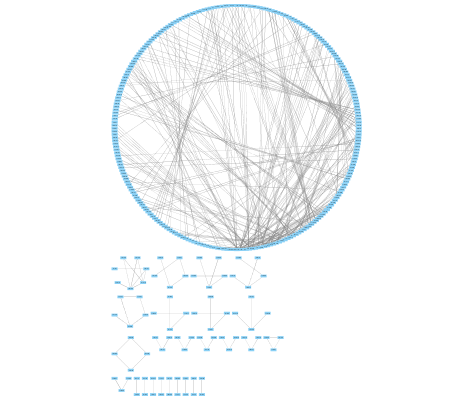

In [6]:
from py2cytoscape.data.cyrest_client import CyRestClient
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Load a sample network
network = cy.network.create_from('http://chianti.ucsd.edu/~kono/data/galFiltered.sif')
yeast = cy.network.create_from('tests/galFiltered.sif')

# Apply layout to the cytoscape network object
# cy.layout.apply(name='degree-circle', network=network)

cy.layout.apply(name='degree-circle', network=yeast)

print('------------- Circular Layout -------------')
# Create Visual Style as code (or by hand if you prefer)
custom_style = cy.style.create('NewStyle')

# You can set default values as key-value pairs.
basic_settings = {
    
    'NODE_FILL_COLOR': '#BAAC38',
    'NODE_SIZE': 100,
    'NODE_BORDER_WIDTH': 0,
    'NODE_LABEL_COLOR': '#555555',
    
    'EDGE_WIDTH': 4,
    'EDGE_TRANSPARENCY': 50,
    
    'NETWORK_BACKGROUND_PAINT': '#2FFFEA'
}

# Set basic style
custom_style.update_defaults(basic_settings)


#cy.style.apply(custom_style)

yeast_png = yeast.get_png(400)
Image(yeast_png)

In [ ]:

network_png = network.get_png(400)
Image(network_png)

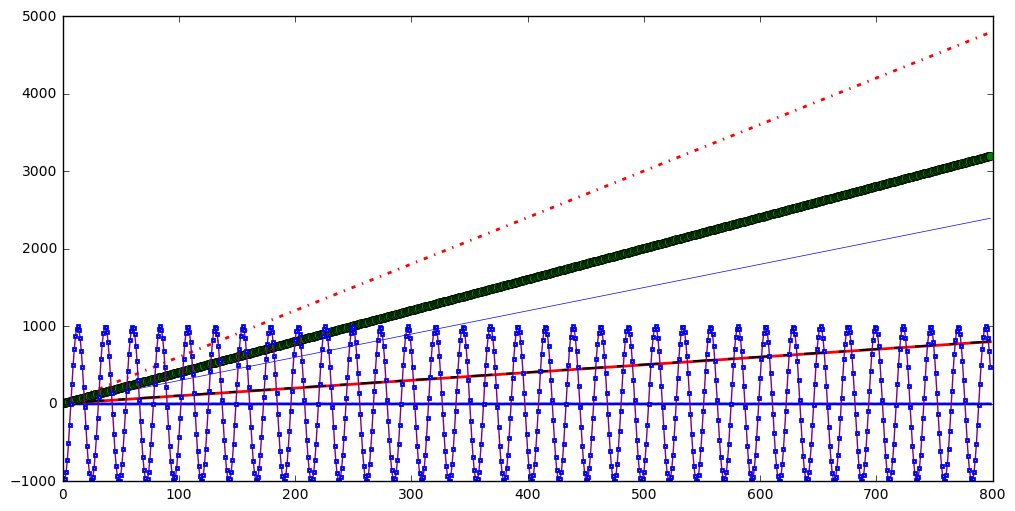

In [39]:
#This is a cookbook example of a multi line plot with a variety of styles

%matplotlib notebook
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, 3 * x+2, color="blue", linewidth=0.50)
#ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, numpy.sin(x + 4), color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, 6 * x+6, color="red", lw=2, ls='-.')
#ax.plot(x, (x+7) / 4, color="red", lw=5, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
#ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, 4 * x+10, color="green", lw=2, ls='--', marker='o')
#ax.plot(x, x+ 11, color="green", lw=2, ls='--', marker='s')
#ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
#ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
#ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
#ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=2, markerfacecolor="red")
ax.plot(x, 1000 * numpy.cos(50 * x+16), color="purple", lw=1, ls='-', marker='s', markersize=2, 
       markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

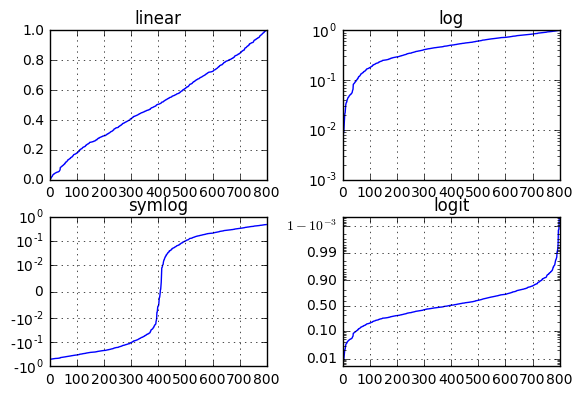

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()